#machine learning
1. regression
2. classification

In [ ]:
print("welcome all")

welcome all


#General steps in machine learning
1. preprocessing of data  (removing columns that r not important)
2. divide your data into x,y (x=questions, y= result)
3. randomly split ur data(x,y) into trainig and test set
4. choose an Estimator(machine learning model) [choosing if it is supervised or unsupervised or reinforcement]
5. model evluation
6. model deployment




In [ ]:
import pandas as pd
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

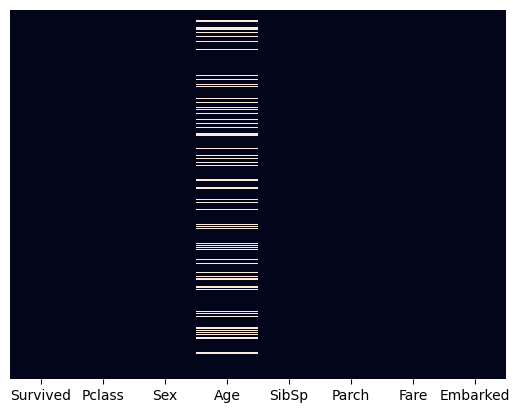

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop([ 'Ticket' , 'Cabin' , 'Name' , 'PassengerId' ],  axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<Axes: xlabel='Survived', ylabel='count'>

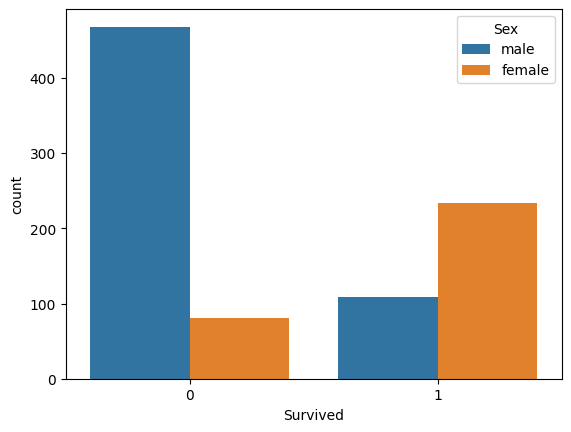

In [ ]:
import seaborn as sns
sns.countplot(x= 'Survived' ,hue= 'Sex' ,data=df)

<Axes: xlabel='Survived', ylabel='count'>

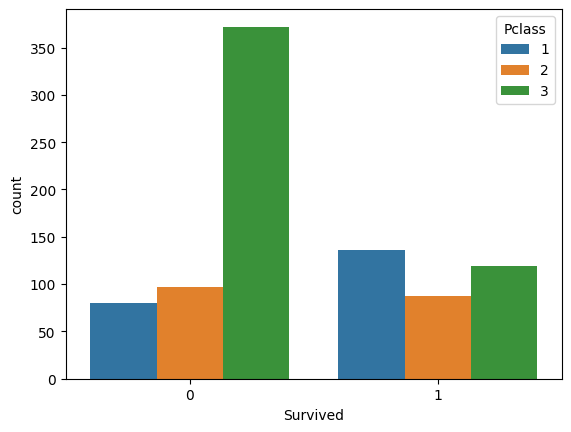

In [ ]:
sns.countplot(x='Survived' ,hue='Pclass' ,data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df[ 'Age' ].median()

28.0

<Axes: xlabel='Pclass', ylabel='Age'>

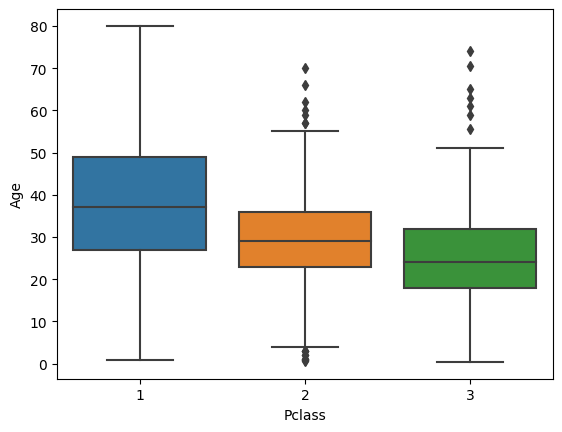

In [ ]:
sns.boxplot(x='Pclass' ,y='Age' ,data=df)

In [ ]:
df[ 'Age' ].fillna(50)

In [ ]:
def impute_age(cols) :
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age) :
    if  Pclass == 1 :
      return 37
    elif  Pclass == 2 :
      return 29
    else:
      return 25
  else:
    return Age


In [ ]:
df[ 'Age' ]=df[['Age' , 'Pclass' ]].apply(impute_age,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.drop(['Embarked','Fare'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [ ]:
gender=pd.get_dummies(df[ 'Sex' ],drop_first=True)

In [ ]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
df=pd.concat( [df,gender],axis=1 )

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,male
0,0,3,male,22.0,1,0,1
1,1,1,female,38.0,1,0,0
2,1,3,female,26.0,0,0,0
3,1,1,female,35.0,1,0,0
4,0,3,male,35.0,0,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,1
887,1,1,female,19.0,0,0,0
888,0,3,female,25.0,1,2,0
889,1,1,male,26.0,0,0,1


In [ ]:
df.drop('Sex' ,axis=1,inplace=True)

In [ ]:
df.head()


,Survived,Pclass,Age,SibSp,Parch,male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [ ]:
x=df.drop('Survived' ,axis=1)
y=df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2)


In [ ]:
ytest

59     0
411    0
110    0
803    1
305    1
      ..
625    0
446    1
694    0
5      0
121    0
Name: Survived, Length: 179, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
mdl=LogisticRegression()
mdl.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
mdlk=KNeighborsClassifier()
mdlk.fit(xtrain,ytrain)


KNeighborsClassifier()

In [ ]:
pred_log=mdl.predict(xtest)

In [ ]:
pred_knn=mdlk.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_log,ytest)


array([[96, 23],
       [15, 45]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_log))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       111
           1       0.75      0.66      0.70        68

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [ ]:
print(classification_report(ytest,pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       111
           1       0.75      0.75      0.75        68

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
df=pd.read_csv('Classified Data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [ ]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
df.head(10)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


In [ ]:
x=df.drop('TARGET CLASS' ,axis=1)
y=df['TARGET CLASS']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
mdlt=LogisticRegression()
mdlt.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
mdlp=KNeighborsClassifier()
mdlp.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
pred_log=mdlt.predict(xtest)

In [ ]:
pred_knn=mdlp.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_log,ytest)

array([[94,  1],
       [ 6, 99]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_log))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       100
           1       0.94      0.99      0.97       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_knn))

              precision    recall  f1-score   support

           0       0.52      0.47      0.49       100
           1       0.52      0.57      0.54       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_knn))

              precision    recall  f1-score   support

           0       0.52      0.47      0.49       100
           1       0.52      0.57      0.54       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_knn,ytest)

array([[47, 43],
       [53, 57]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_knn))

              precision    recall  f1-score   support

           0       0.52      0.47      0.49       100
           1       0.52      0.57      0.54       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200



In [ ]:
import pickle
with open('knn_brain','wb') as file:
     pickle.dump(mdlk,file)

In [ ]:
import pickle
with open('knn_brain','wb') as file:
     pickle.dump(mdlp,file)

In [ ]:
import pickle
with open('kn_brain','wb') as file:
     pickle.dump(mdlp,file)